In [172]:
# Predicting Purchase during Black Friday at a store
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [173]:
# Load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [174]:
# Merge the files
bfreport = train.append(test,ignore_index=True)

C:\Users\chimi\AppData\Local\Temp\ipykernel_13348\185829832.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bfreport = train.append(test,ignore_index=True)


In [175]:
# Numbers of rows and columns
nums_rows = bfreport.shape[0]
nums_cols = bfreport.shape[1]
print(nums_rows,nums_cols)

783667 12


In [176]:
bfreport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [177]:
#Columns names
bfreport.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

Text(0.5, 1.0, 'Data Types charts')

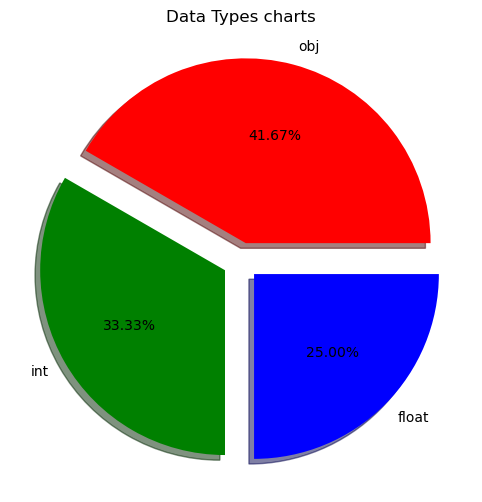

In [178]:
# Data Types 
obj_type = bfreport.dtypes.value_counts()
labels = ['obj','int','float']
colors = ['red','green','blue']
explode = [0.1,0.1,0.1]

# Visualization
plt.figure(figsize=(12,6))
plt.pie(obj_type,explode=explode,labels=labels,colors=colors,autopct='%1.2f%%',shadow=True)
plt.title('Data Types charts',loc='center')

In [179]:
# Which columns have numerical data?
nums_cols = []
for c in bfreport.columns:
    if bfreport.dtypes[c] == 'int64' or bfreport.dtypes[c] == 'float64':
        nums_cols.append(c)
print(nums_cols)

['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']


In [180]:
# Object columns type
nums_obj = [c for c in bfreport.columns if bfreport.dtypes[c] == 'object']
print(nums_obj)

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']


In [181]:
#Count non missing values
bfreport.count()

User_ID                       783667
Product_ID                    783667
Gender                        783667
Age                           783667
Occupation                    783667
City_Category                 783667
Stay_In_Current_City_Years    783667
Marital_Status                783667
Product_Category_1            783667
Product_Category_2            537685
Product_Category_3            237858
Purchase                      550068
dtype: int64

In [182]:
# Display the first five rows 
bfreport.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [183]:
# Display the last 5 rows
bfreport.tail(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
783662,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
783663,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
783664,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
783665,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN
783666,1006039,P00316642,F,46-50,0,B,4+,1,4,5.0,NaN,NaN


In [184]:
# Descripitive statistics
bfreport.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667,783667,783667,783667.000000,783667,783667,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
unique,NaN,3677,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,2709,590031,313015,NaN,329739,276425,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.079300,NaN,NaN,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,NaN,NaN,NaN,6.522206,NaN,NaN,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


In [185]:
# Detecting duplicates and removing them
# No duplicates in our data/all unique values
bfreport.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
783662    False
783663    False
783664    False
783665    False
783666    False
Length: 783667, dtype: bool

In [186]:
# Number of unique values
bfreport.nunique()

User_ID                        5891
Product_ID                     3677
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [187]:
# Dropping user_id and product_id since they have the most unique values out of the predictors
bfreport.drop(columns=['User_ID','Product_ID'],inplace=True)

<AxesSubplot:>

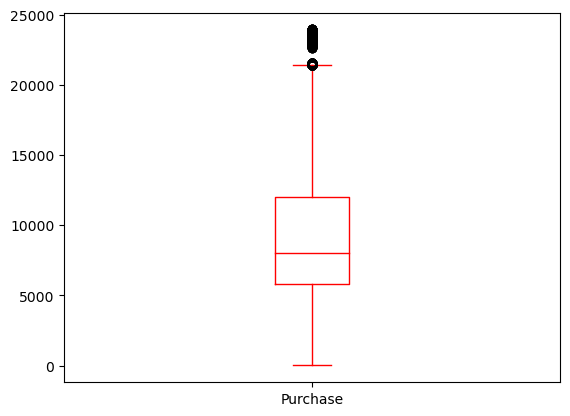

In [188]:
# Outlier detection visually
bfreport['Purchase'].plot(kind='box',color='r')

In [189]:
# IQR outlier identification
minimum =bfreport.Purchase.min()
maximum =bfreport.Purchase.max()
q1=bfreport.Purchase.quantile(0.25)
q3=bfreport.Purchase.quantile(0.75)
iqr=q3-q1

In [190]:
# lc < min no outliers no lic
# uc < max outliers on upper side
lc = q1 - 1.5*iqr
uc = q3 + 1.5*iqr
print('Max' + str(maximum),'min:'+str(minimum),'uc:'+str(uc),'lc:'+str(lc))

Max23961.0 min:12.0 uc:21400.5 lc:-3523.5


In [191]:
#Clip them 
bfreport['Purchase'].clip(upper=uc,inplace=True)

<AxesSubplot:>

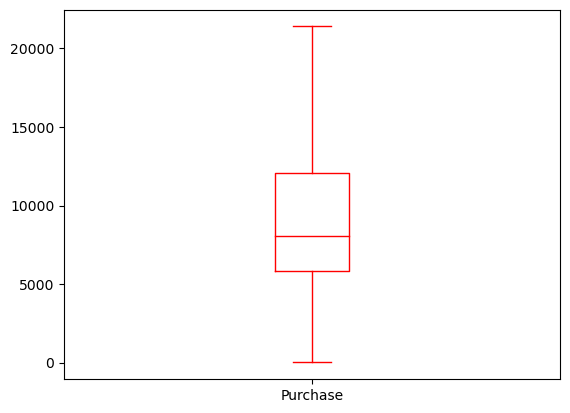

In [192]:
# Visualization after removal
bfreport['Purchase'].plot(kind='box',color='r')

In [193]:
bfreport.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

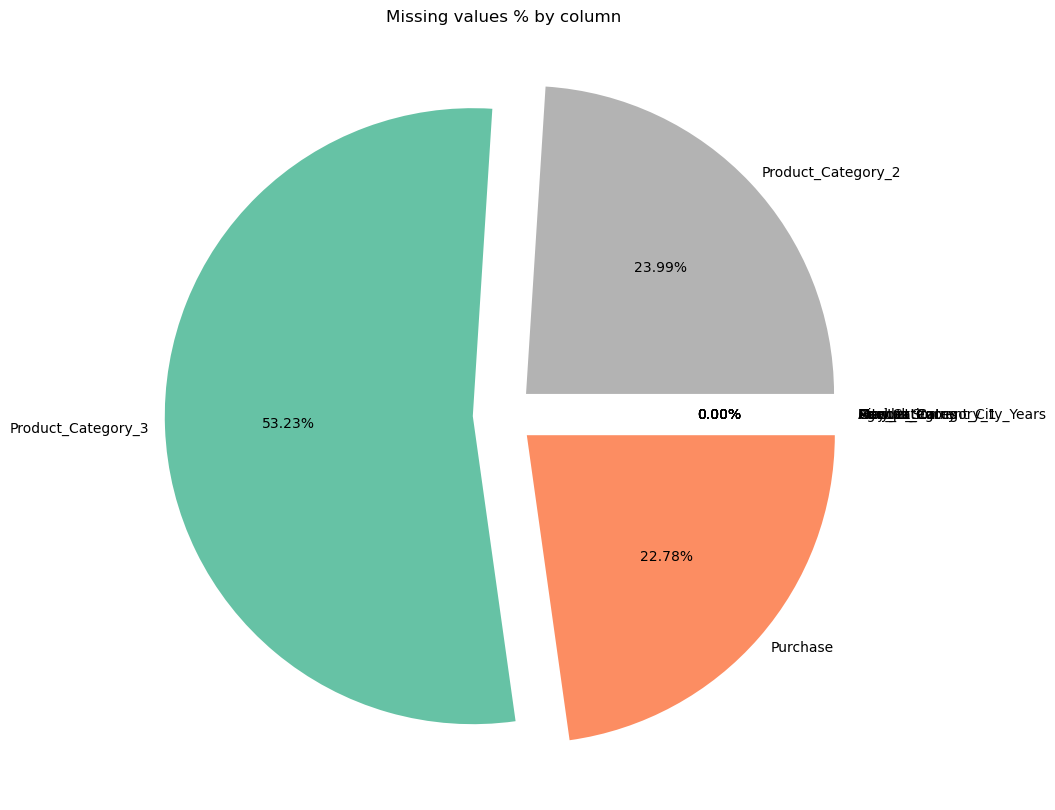

In [194]:
# Average Missing values
ms_value = bfreport.isnull().mean()
labels = [c for c in bfreport.columns]
explode = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
# Visualization
plt.figure(figsize=(10,10))
plt.pie(ms_value,explode=explode,labels=labels,autopct='%1.2f%%',labeldistance=1.05)
plt.title('Missing values % by column')
plt.xlabel

In [195]:
# Handle missing data
# Replace categorical with mode and median for purchase
fill_mode = lambda col : col.fillna(col.mode()[0])
bfreport[['Product_Category_2','Product_Category_3']] = bfreport[['Product_Category_2', 'Product_Category_3']].apply(fill_mode)

In [196]:
# Fill Purchase with median
bfreport['Purchase'] = bfreport['Purchase'].fillna(bfreport['Purchase'].median())

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Purchase', ylabel='Density'>

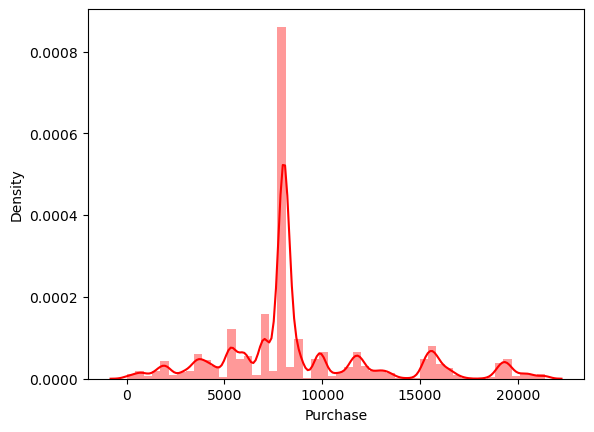

In [197]:
#Univariate analysis of target variable.
sns.distplot(bfreport['Purchase'],kde='True',color='r')

Text(0.5, 1.0, 'Gender transcation Gap')

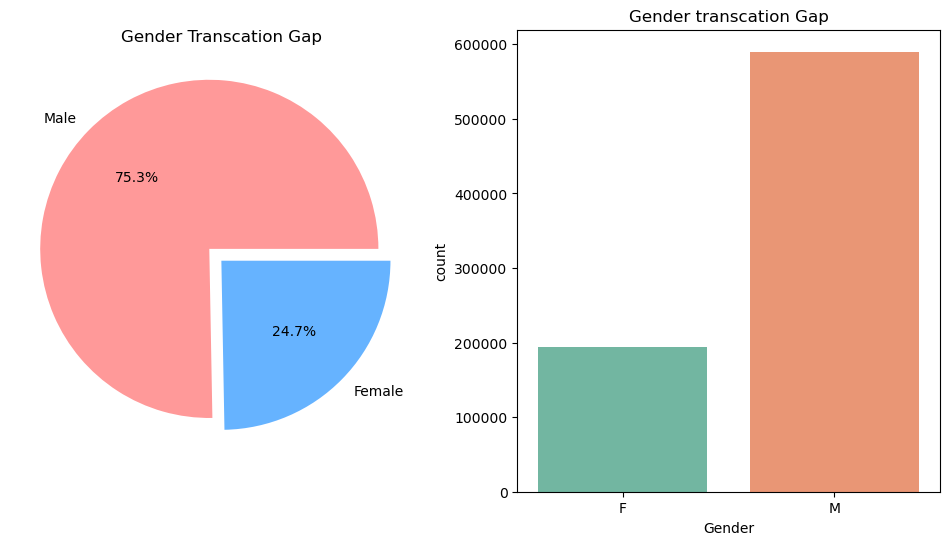

In [198]:
# Exploring Categorical and numerical variables
#Male represent 75% of the transactions while the woman represents only 25%.
#plot 1
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
size = bfreport['Gender'].value_counts()
parameters = {'labels':size.index.map({'M': 'Male', 'F': 'Female'}),
              'explode':(0.1,0),
              'colors':('#ff9999','#66b3ff'),
              'autopct':'%1.1f%%'}

plt.pie(size,**parameters)
plt.title('Gender Transcation Gap')
#plot 2
plt.subplot(1,2,2)
sns.countplot(x='Gender',data=bfreport)
plt.title('Gender transcation Gap')

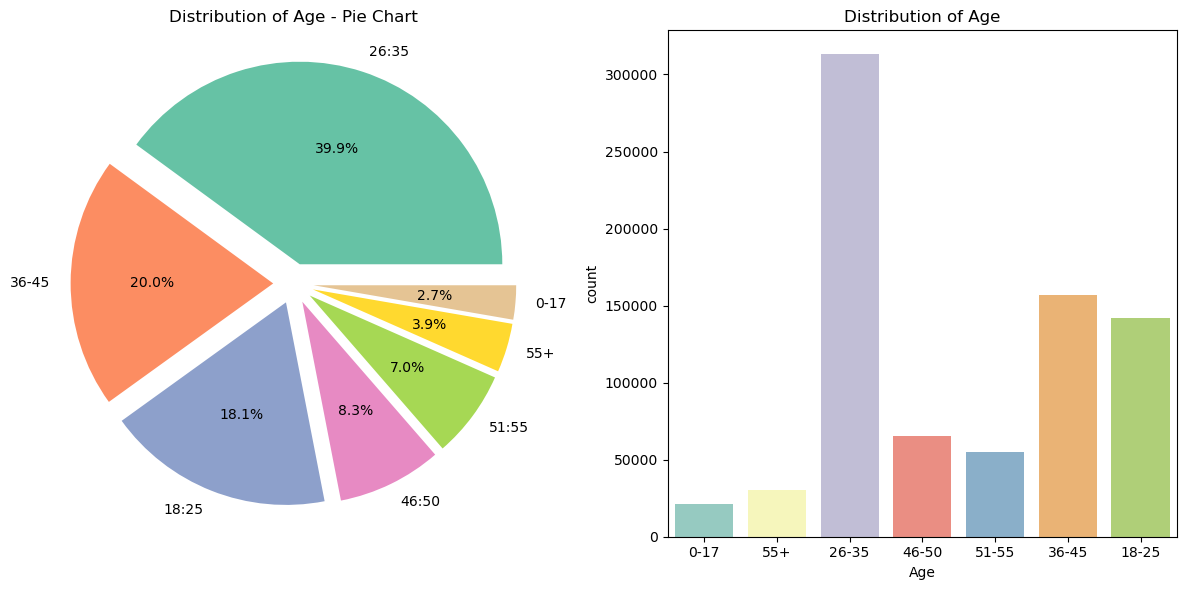

In [199]:
# Age analysis
#26-35-year-olds account for a large share of transactions.
plt.figure(figsize=(12,6))
plt.subplot(1,2,2)
#plot 1
sns.countplot(x='Age',data=bfreport,palette='Set3')
plt.title('Distribution of Age')

#plot 2
plt.subplot(1,2,1)
size = bfreport['Age'].value_counts().sort_values(ascending=False)
parameters = {'labels':size.index.map({'26-35':'26:35', '36-45':'36-45', '18-25':'18:25', '46-50':'46:50', '51-55':'51:55', '55+':'55+', '0-17':'0-17'}),
              'explode':[0.1,0.1,0.1,0.1,0.1,0.1,0.1],
              'autopct':'%1.1f%%'}
plt.title('Distribution of Age - Pie Chart')

plt.pie(size,**parameters)


plt.tight_layout()
plt.show()

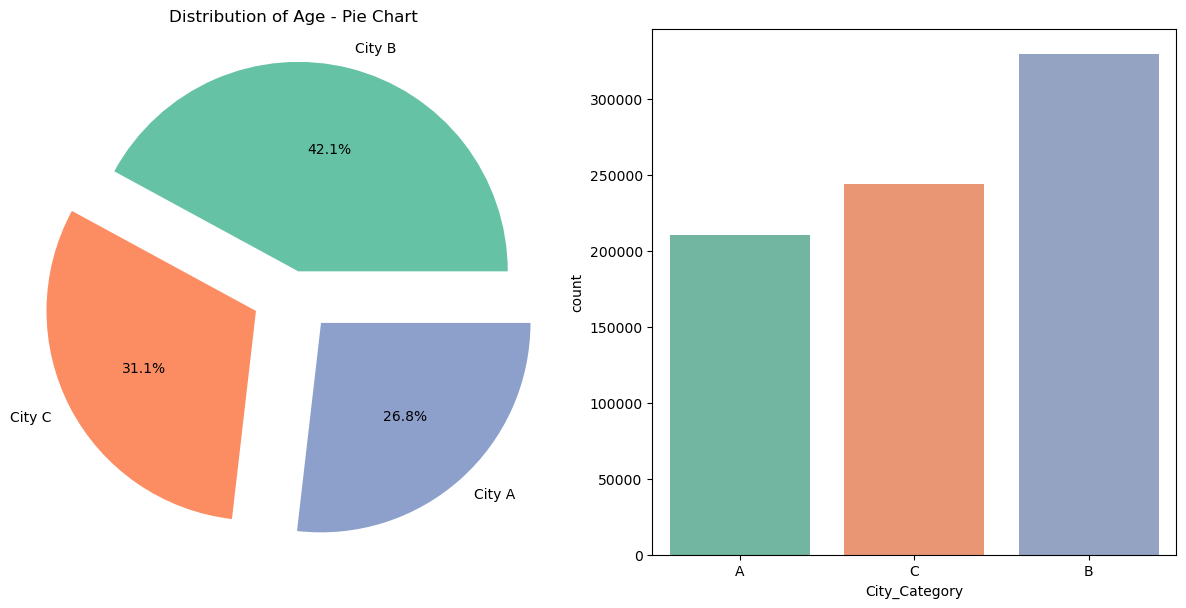

In [200]:
# City Category Distribution
#  City B has the most amount of transactions.
plt.figure(figsize=(12,6))
sns.set_palette('Set2')
#plot 1
plt.subplot(1,2,1)
size1 = bfreport['City_Category'].value_counts()
parameters = {'labels':['City B','City C','City A']
              ,'explode':[0.1,0.2,0.2],
              'autopct':'%1.1f%%'}
plt.pie(size1,**parameters,)
plt.title('Distribution of Age - Pie Chart')
#plot 2
plt.subplot(1,2,2)
sns.countplot(x='City_Category',data=bfreport)


plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Stay in Years distribution')

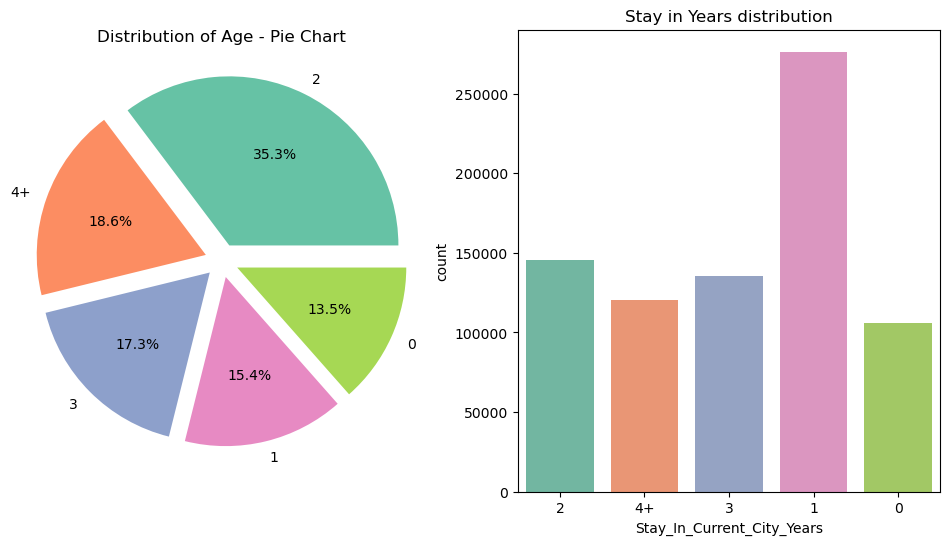

In [201]:
#Stay_in_years
#Most people stay in the city for at least two years.
plt.figure(figsize=(12,6))
#plot 1
plt.subplot(1,2,1)
size1 = bfreport['Stay_In_Current_City_Years'].value_counts()
parameters = {'labels':[2,'4+',3,1,0]
              ,'explode':[0.1,0.1,0.1,0.1,0.1],
              'autopct':'%1.1f%%'}
plt.pie(size1,**parameters,)
plt.title('Distribution of Age - Pie Chart')
#plot 2
plt.subplot(1,2,2)
sns.countplot(x='Stay_In_Current_City_Years',data=bfreport)
plt.title('Stay in Years distribution')

Text(0.5, 1.0, 'Single vs Married')

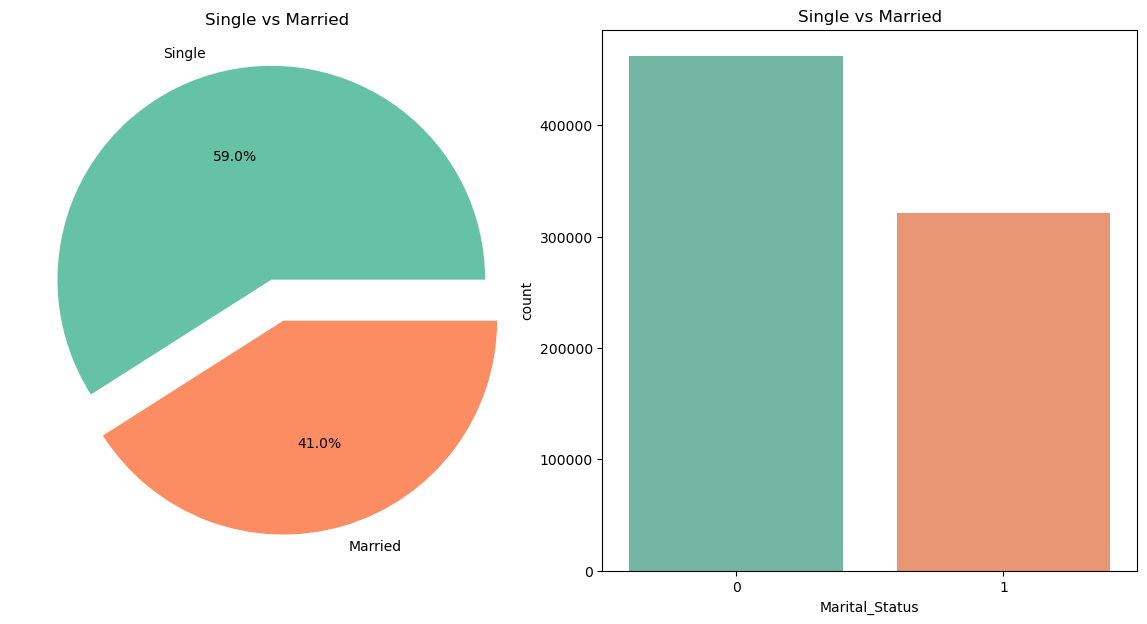

In [202]:
# Marital_Status
# The majority of the consumers are single.
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6))

fig.tight_layout()
#plot1
size2 = bfreport['Marital_Status'].value_counts()
parameters = {'labels':size2.index.map({0 :'Single',1:'Married'})
              ,'explode':[0.1,0.1],
              'autopct':'%1.1f%%'}
ax[0].pie(size2,**parameters)
ax[0].set_title('Single vs Married')
#plot 2
ax = sns.countplot(x='Marital_Status',data=bfreport)
ax.set_title('Single vs Married')


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


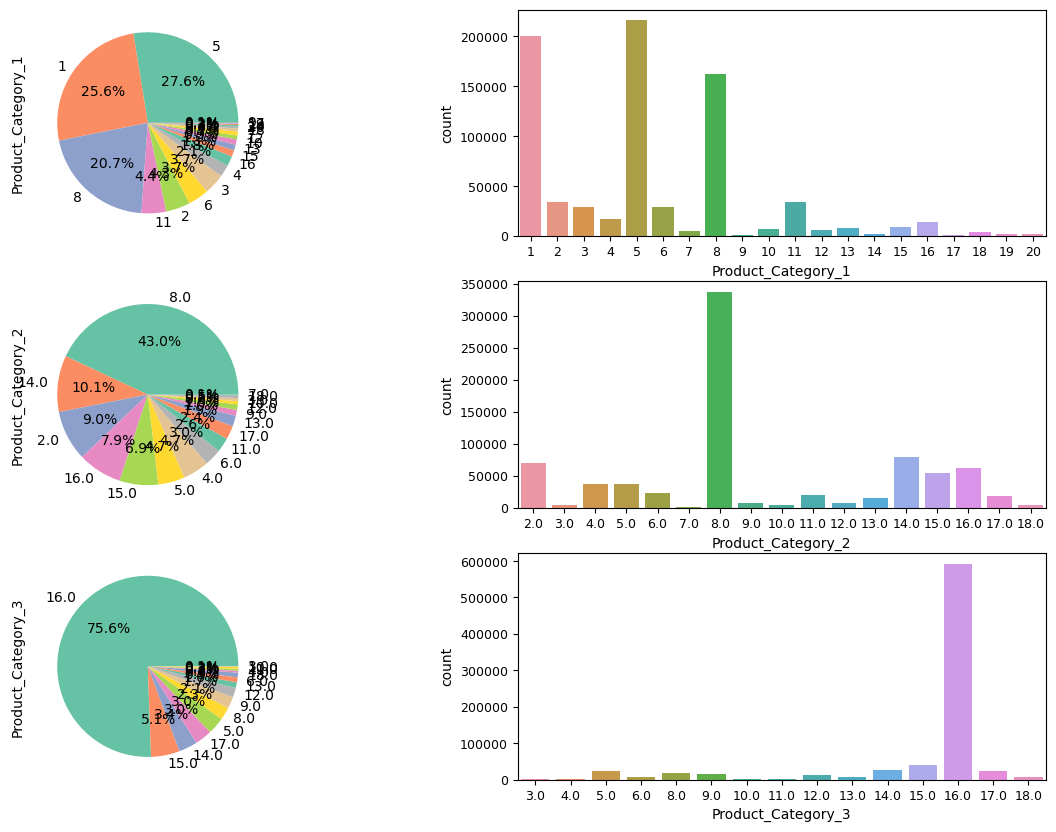

In [203]:
#Most popular item sold are product_category_1(item 8), product_category_2(8.0), and product_category_3(16.0) 
cols = ['Product_Category_1','Product_Category_2','Product_Category_3']
count = 1
for col in cols:
    sns.set_palette('Set2')
    plt.subplot(3,2,count)
    bfreport[col].value_counts().plot.pie(autopct='%1.1f%%',radius=1.0)
    count+=1
    plt.subplot(3,2,count)
    sns.countplot(col,data=bfreport)
    fig = plt.gcf()
    fig.set_size_inches(15,10)
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
    plt.tight_layout
    count+=1


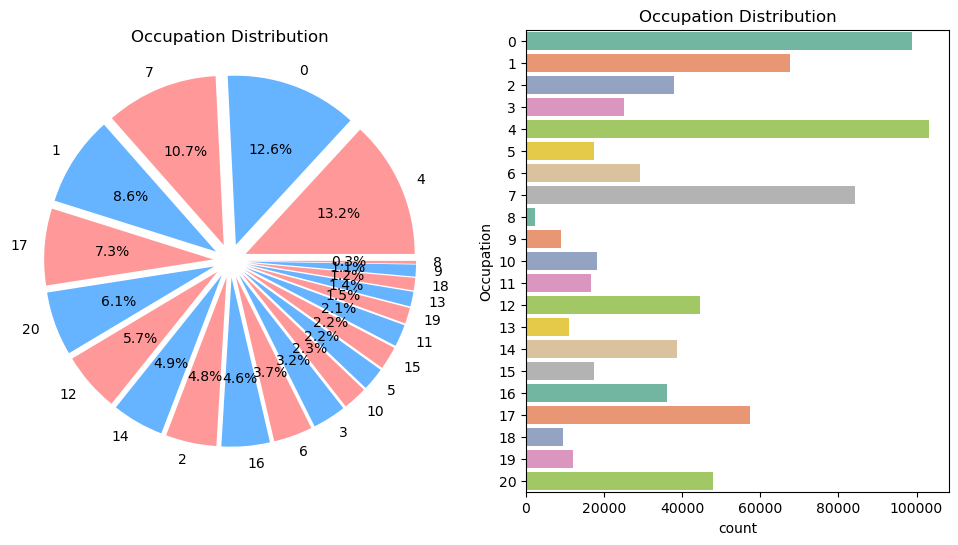

In [204]:
#Occupation
#  Out of the 20 occupations, maximum buyers from occupation 4.

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
size2 = bfreport['Occupation'].value_counts()
parameters = {'labels':(4, 0, 7, 1, 17, 20, 12, 14, 2, 16, 6, 3, 10, 5, 15, 11, 19, 13, 18,
            9,8),
              'explode':(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
            0.1,0.1),
              'colors':('#ff9999','#66b3ff'),
              'autopct':'%1.1f%%'}

plt.pie(size2,**parameters)
plt.title('Occupation Distribution')

#plot2
plt.subplot(1,2,2)
sns.countplot(y='Occupation',data=bfreport,palette='Set2')
plt.title('Occupation Distribution')


plt.show()

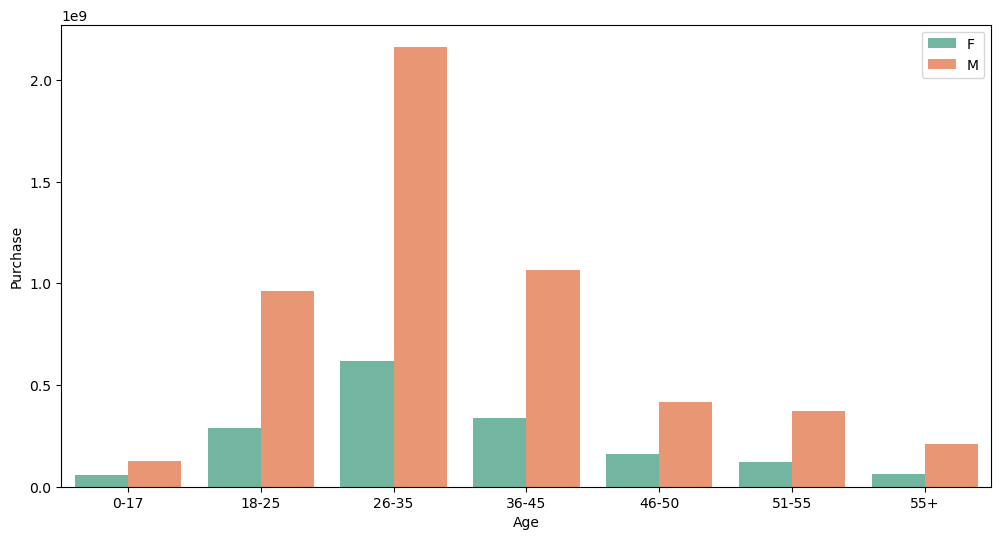

In [205]:
# Bivariate analysis between numerical and categorical
# Overall, men consistently have a higher total purchase amount across all ages.
# Irrespective of gender, 26-35 are the maximum buyers.
total_purchase = bfreport.groupby(['Age','Gender'])['Purchase'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x='Age',y='Purchase',data=total_purchase,order=['0-17','18-25','26-35','36-45','46-50','51-55','55+'],hue='Gender')
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', ncol=1)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


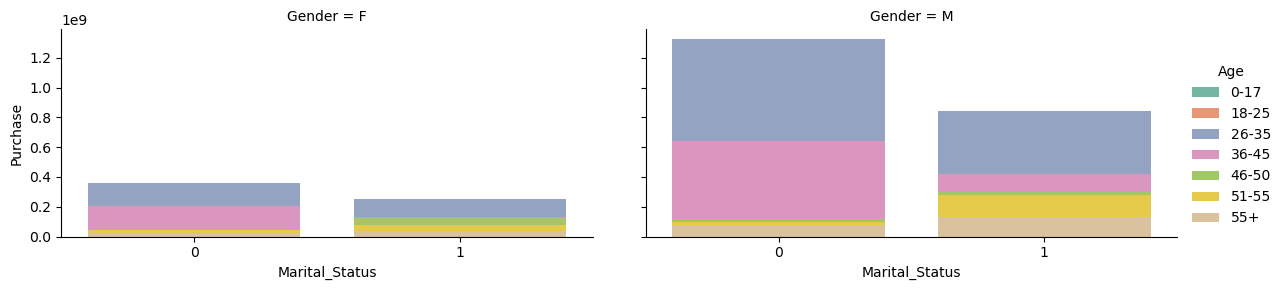

In [206]:
#Marital Status
# Irrespective of gender, single people are generally more likely to purchase more than married people.
# Irrespective of marital status/gender, 26-35 years old is the maximum number of buyers.
total_purchase = bfreport.groupby(['Marital_Status','Gender','Age'])['Purchase'].sum().reset_index()
g = sns.FacetGrid(total_purchase,col='Gender',hue='Age',size=3,aspect=2,palette='Set2')
g = (g.map(sns.barplot,'Marital_Status','Purchase').add_legend().fig.subplots_adjust(wspace=0.1 , hspace=0.1))

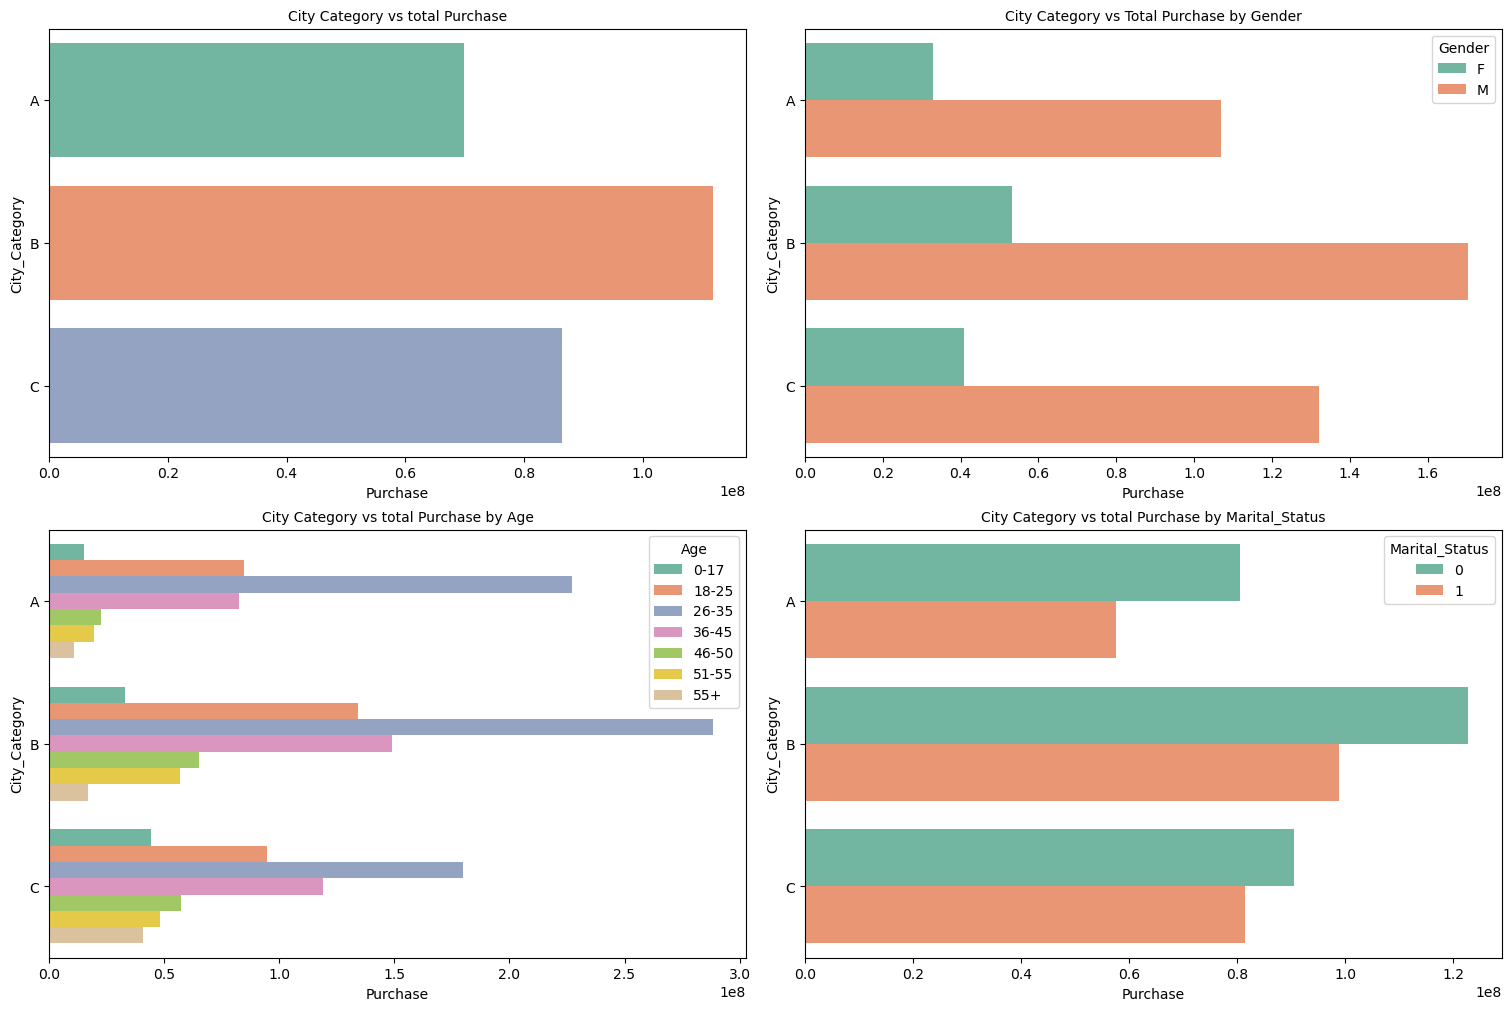

In [207]:
# Comparing demographic and city_category.
# City B has the maximum purchase overall in gender and marital status.
# Maximum buyers from ages 26-35 are from city B too.
city_data = bfreport.groupby(['City_Category','Gender','Age','Marital_Status'])['Purchase'].sum().reset_index()
sns.set_palette('Set2')
fig, axes = plt.subplots(2, 2, figsize=(15,10),constrained_layout = True)

#subplot 1
sns.barplot(ax=axes[0, 0], data=city_data, y='City_Category', x='Purchase',ci=None)
sns.barplot(ax=axes[0,1], data=city_data, y='City_Category', x='Purchase',hue='Gender',ci=None)
ax=axes[0,0].set_title('City Category vs total Purchase',size=10)
ax=axes[0,1].set_title('City Category vs Total Purchase by Gender',size=10)
#subplots2
sns.barplot(ax=axes[1, 0], data=city_data, y='City_Category', x='Purchase',hue='Age',ci=None)
sns.barplot(ax=axes[1,1], data=city_data, y='City_Category', x='Purchase',hue='Marital_Status',ci=None)
ax=axes[1,0].set_title('City Category vs total Purchase by Age',size=10)
ax=axes[1,1].set_title('City Category vs total Purchase by Marital_Status',size=10)

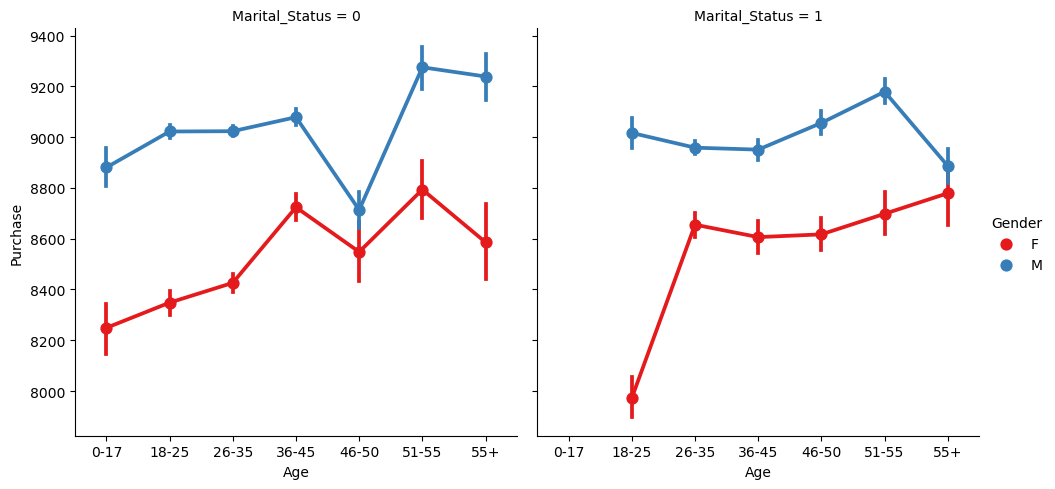

In [208]:
# Looking at median Purchases by Age +Marital_Status+Gender
# Males 51 -55 years old irrelevant of marital_status have median purchase ranging from 9000+ to 9200+, the maximum among all gr
sns.catplot(x='Age',y='Purchase',hue='Gender',col='Marital_Status',data=bfreport,kind='point',palette='Set1',order=['0-17','18-25','26-35','36-45','46-50','51-55','55+'])

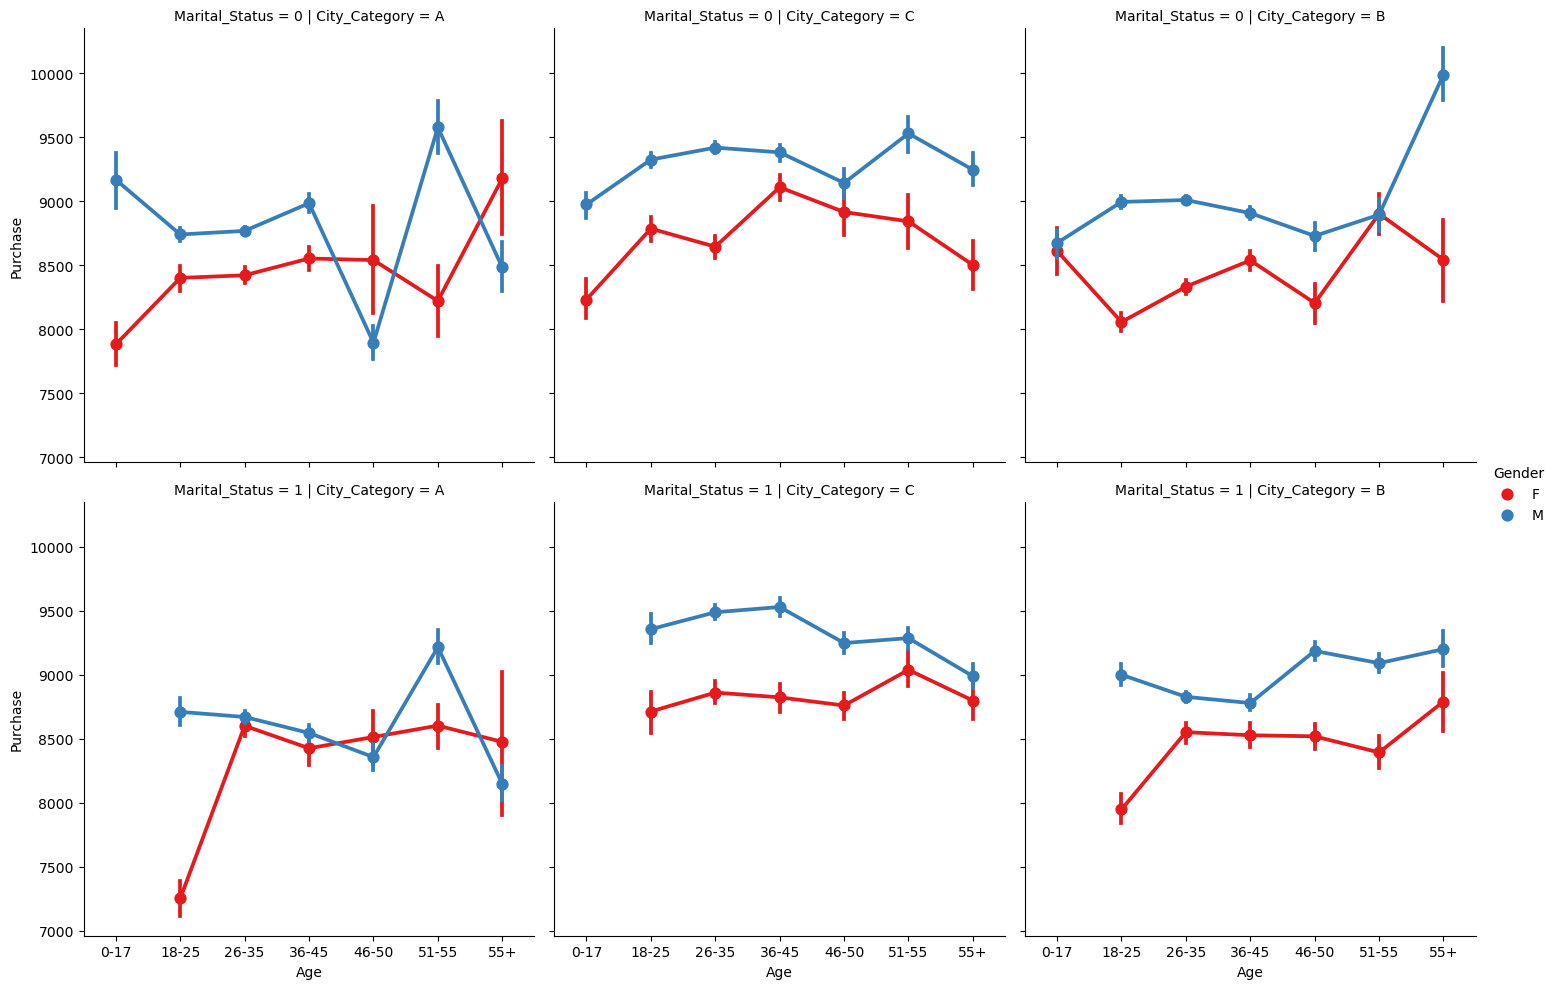

In [212]:
# Looking at Median purchases by City through demographics
# City A -  Irrespective of martial status,51-55-year-old Males have the highest median purchase.
sns.catplot(x='Age',y='Purchase',hue='Gender',col='City_Category',row='Marital_Status',data=bfreport,kind='point',palette='Set1',order=['0-17','18-25','26-35','36-45','46-50','51-55','55+'])

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

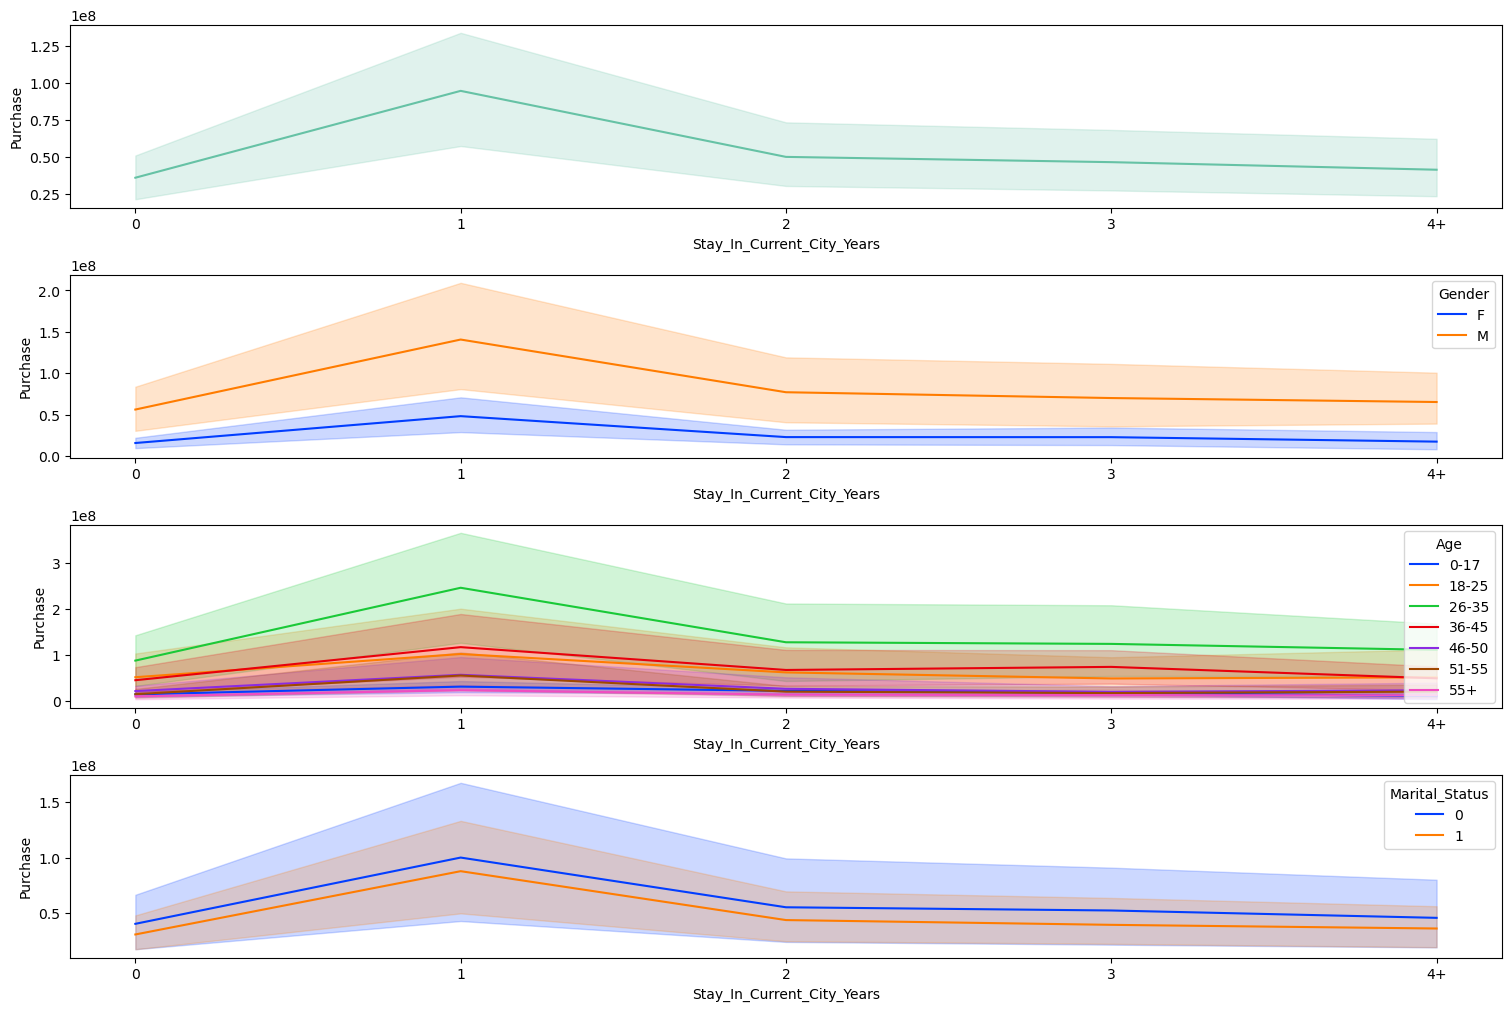

In [213]:
# Stay in City Trend
# Across all demographics, people follow the trend of purchasing more when they live in a city for less than a year.
# The only demographics which show consistency is among 55+ individuals regardless of sex and 0-17. 
year_data = bfreport.groupby(['Stay_In_Current_City_Years','Gender','Age','Marital_Status'])['Purchase'].sum().reset_index()


fig, axes = plt.subplots(4,1, figsize=(15,10),constrained_layout = True)
# plot
sns.lineplot(ax=axes[0],x='Stay_In_Current_City_Years',y='Purchase',data=year_data,palette='bright')

sns.lineplot(ax=axes[1],x='Stay_In_Current_City_Years',y='Purchase',data=year_data,hue='Gender',palette='bright')
sns.lineplot(ax=axes[2],x='Stay_In_Current_City_Years',y='Purchase',data=year_data,hue='Age',palette='bright')
sns.lineplot(ax=axes[3],x='Stay_In_Current_City_Years',y='Purchase',data=year_data,hue='Marital_Status',palette='bright')

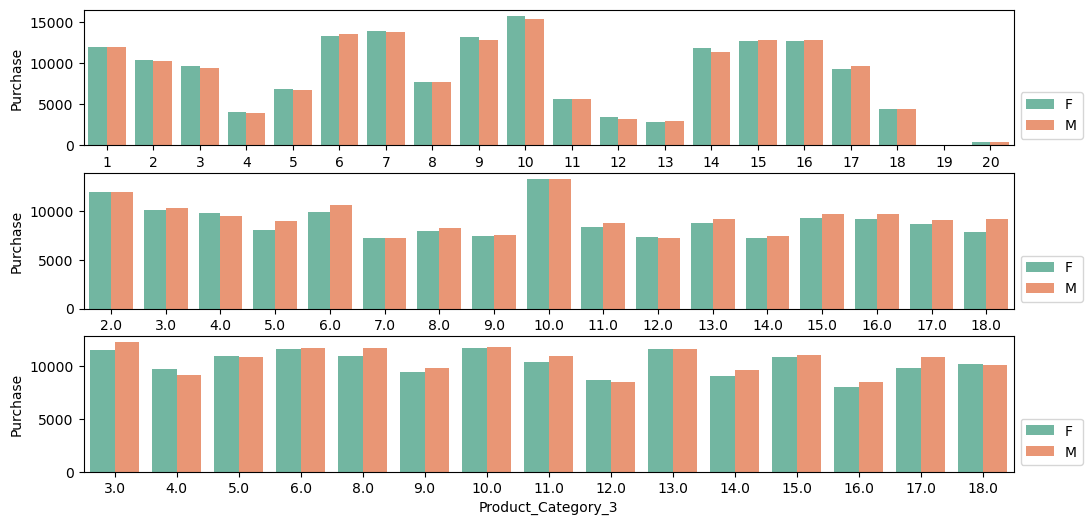

In [214]:
# What products did consumers buy?
# Male and females purchased product 10 the most from categories 1 and 2
# From Product_Category_3, males purchased product 3 the most, and females purchased 10.0
# The distribution of the purchase has no wide gap and is consistent.
sns.set_palette('Set2')
fig, axes = plt.subplots(3,1,figsize=(12,6))

sns.barplot(ax=axes[0],x='Product_Category_1',y='Purchase',hue='Gender',data=bfreport,ci=None)
sns.barplot(ax=axes[1],x='Product_Category_2',y='Purchase',hue='Gender',data=bfreport,ci=None)
sns.barplot(ax=axes[2],x='Product_Category_3',y='Purchase',hue='Gender',data=bfreport,ci=None)
ax=axes[0].legend(bbox_to_anchor=(1,0),loc='lower left')
ax=axes[1].legend(bbox_to_anchor=(1,0),loc='lower left')
ax=axes[2].legend(bbox_to_anchor=(1,0),loc='lower left')


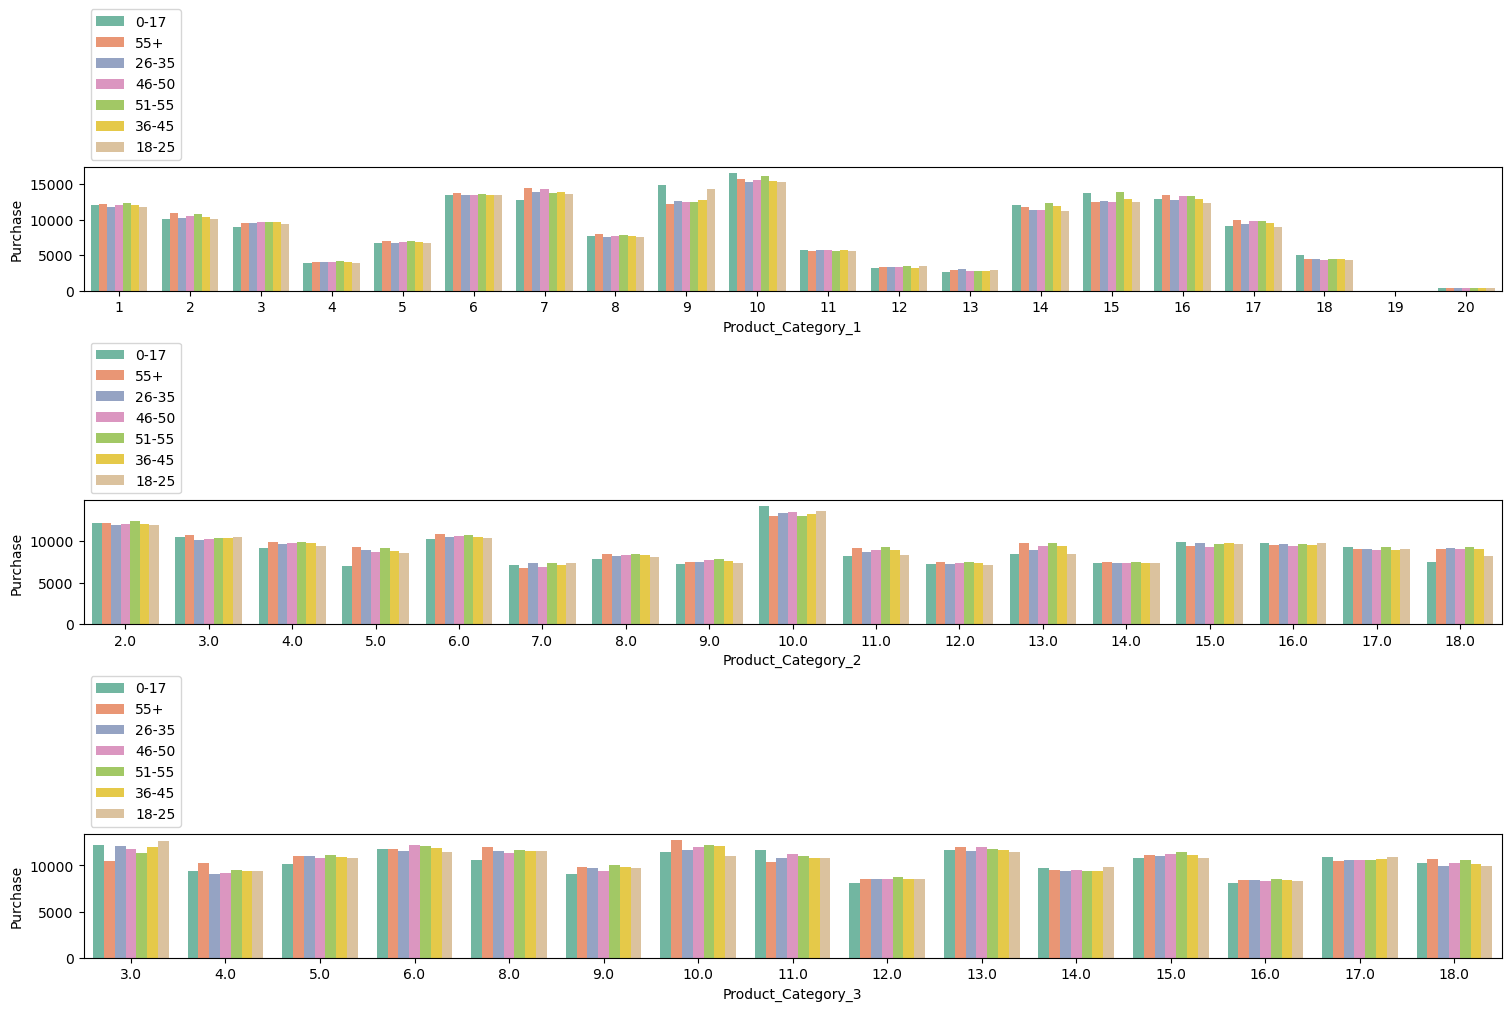

In [215]:
#What did consumers buy?
#Product 10 seems to be the most popular product among all ages.
# It looks consumers
sns.set_palette('Set2')
fig, axes = plt.subplots(3, 1, figsize=(15,10),constrained_layout = True)
sns.barplot(ax=axes[0],x='Product_Category_1',y='Purchase',hue='Age',data=bfreport,ci=None)
sns.barplot(ax=axes[1],x='Product_Category_2',y='Purchase',hue='Age',data=bfreport,ci=None)
sns.barplot(ax=axes[2],x='Product_Category_3',y='Purchase',hue='Age',data=bfreport,ci=None)
ax=axes[0].legend(bbox_to_anchor=(0,1),loc='lower left')
ax=axes[1].legend(bbox_to_anchor=(0,1),loc='lower left')
ax=axes[2].legend(bbox_to_anchor=(0,1),loc='lower left')


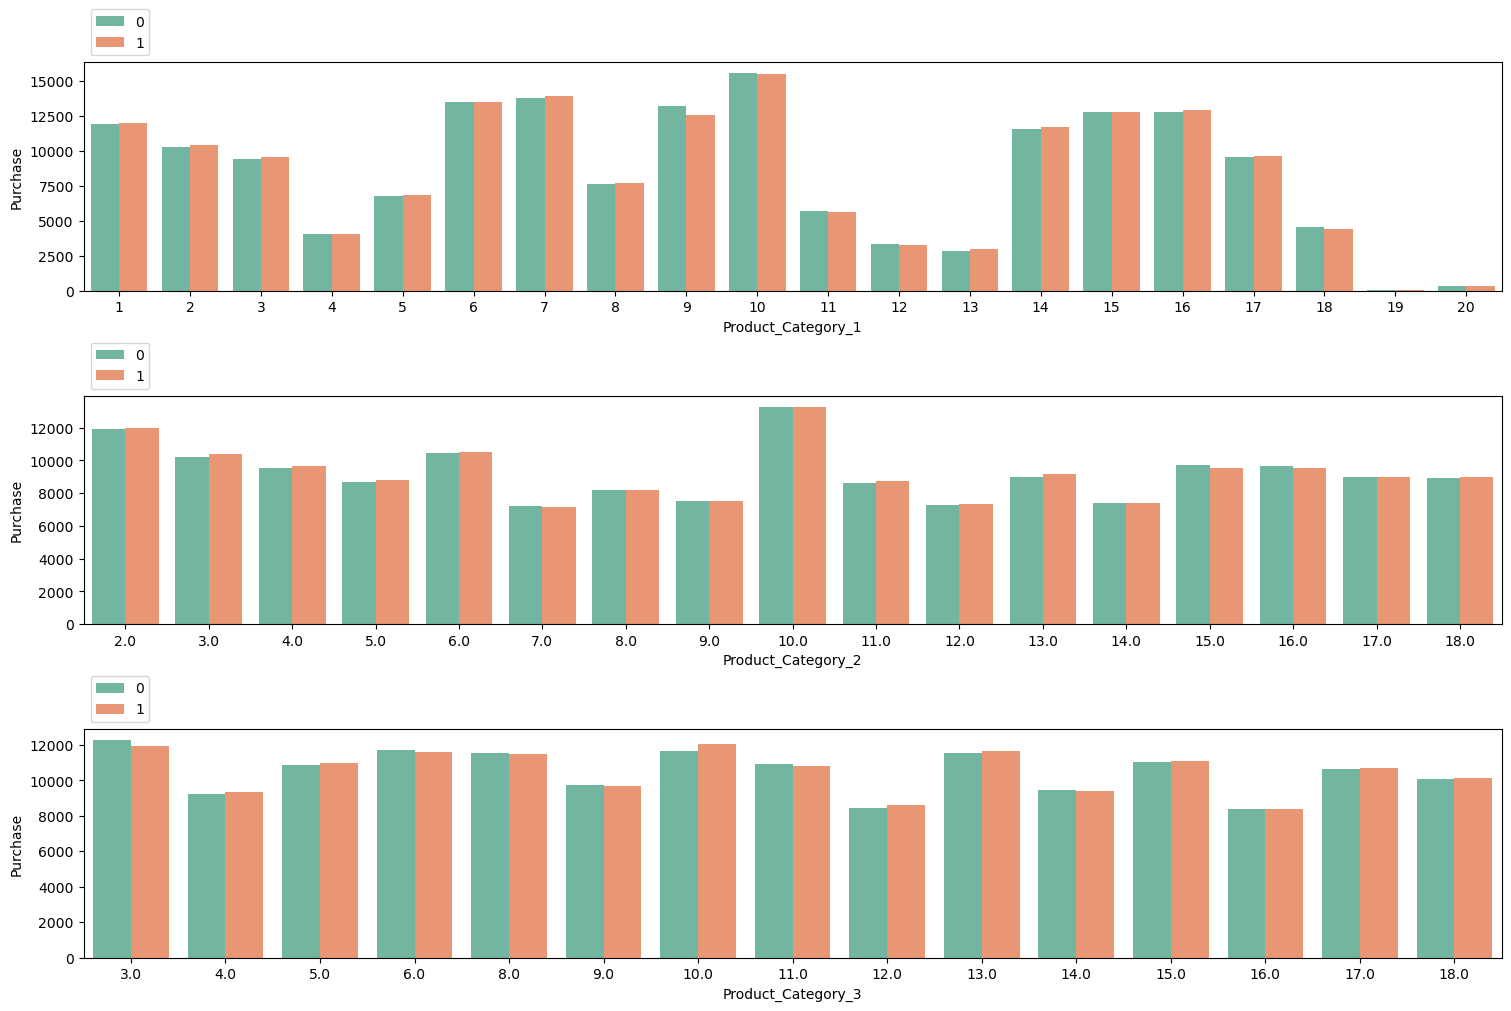

In [216]:
##What did consumers buy?
#Product 10 seems to be the most popular product among all categories 1 and 2.
#While product 3.0  from product_category_3 is popular among single buyers. 
sns.set_palette('Set2')
fig, axes = plt.subplots(3, 1, figsize=(15,10),constrained_layout = True)
sns.barplot(ax=axes[0],x='Product_Category_1',y='Purchase',hue='Marital_Status',data=bfreport,ci=None)
sns.barplot(ax=axes[1],x='Product_Category_2',y='Purchase',hue='Marital_Status',data=bfreport,ci=None)
sns.barplot(ax=axes[2],x='Product_Category_3',y='Purchase',hue='Marital_Status',data=bfreport,ci=None)
ax=axes[0].legend(bbox_to_anchor=(0,1),loc='lower left')
ax=axes[1].legend(bbox_to_anchor=(0,1),loc='lower left')
ax=axes[2].legend(bbox_to_anchor=(0,1),loc='lower left')

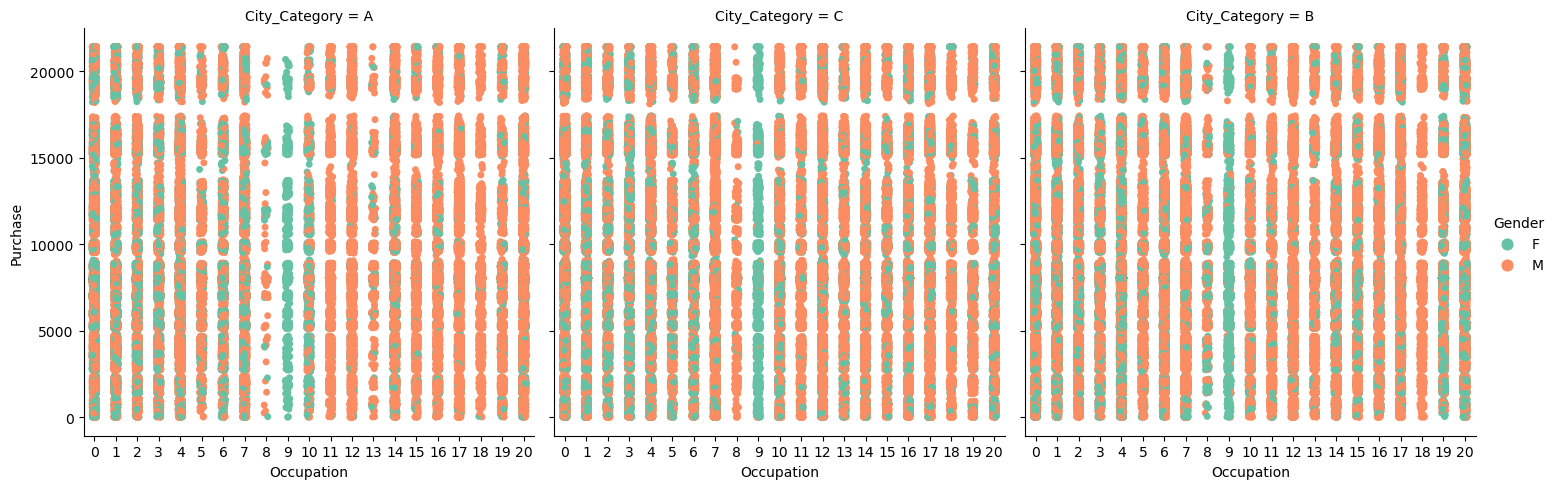

In [217]:
#Occupation vs Purchase
# Across cities, Occupation 9 purchases are majorly female.
sns.catplot(x='Occupation',y='Purchase',data=bfreport,hue='Gender',kind='strip',col='City_Category')

In [129]:
# Create two new columns to extract more information from Age
for col in ['Age']:
    bfreport = bfreport.join(bfreport[col]
    .str.replace('+','',regex=False)                         
    .str.extract(pat=r"^(\d+)*[-]*(\d+)*$").astype('float')
    .rename({0:'Lower_Age',1:'Upper_Age'},axis='columns'))

In [130]:
# Check for mising values
bfreport['Lower_Age'].isnull().sum()
bfreport['Upper_Age'].isnull().sum()

30579

In [131]:
# Replace N/A in lower_age with random 55+ age as value correspond to it
bfreport['Upper_Age'].fillna(value=round(np.random.uniform(56.0,100.0),0),inplace=True)

In [132]:
# Replace + sign with integer for stay_in_current_years
bfreport['Stay_In_Current_City_Years'].replace('4+',4,inplace=True)

In [133]:
# Convert some of the variables to int numeric
bfreport[['Stay_In_Current_City_Years','Product_Category_1','Product_Category_2', 'Product_Category_3','Lower_Age','Upper_Age']]= bfreport[['Stay_In_Current_City_Years','Product_Category_1','Product_Category_2', 'Product_Category_3','Lower_Age','Upper_Age']].astype('int')

In [134]:
# Age variable is no longer need since we converted it to numeric
bfreport.drop('Age',axis=1,inplace=True)

In [135]:
#Convert Other variables to numeric
encode_gender =lambda x : 1 if x == 'F' else 0
bfreport['Gender'] = bfreport['Gender'].apply(encode_gender)

In [136]:
# City_Category
def encode_city(city):
    if city == 'A':
        return 0
    elif city == 'B':
        return 1
    elif city == 'C':
        return 2


In [137]:
bfreport['City_Category'] = bfreport['City_Category'].apply(encode_city)

In [138]:
# Log transformation to bring down the skewedness 
bfreport['Purchase'] = np.log(bfreport['Purchase'])

In [139]:
bfreport = pd.get_dummies(bfreport)
bfreport.head()

,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Lower_Age,Upper_Age
0,1,10,0,2,0,3,8,16,9.032409,0,17
1,1,10,0,2,0,1,6,14,9.629051,0,17
2,1,10,0,2,0,12,8,16,7.259820,0,17
3,1,10,0,2,0,12,14,16,6.963190,0,17
4,0,16,2,4,0,8,8,16,8.983314,55,68


<AxesSubplot:>

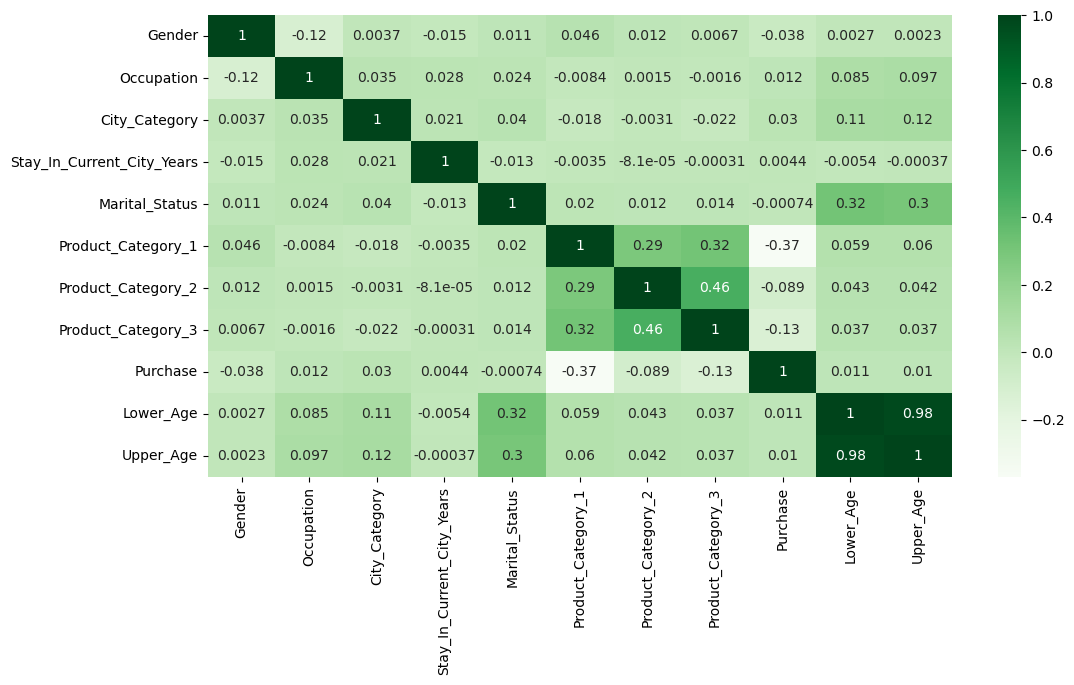

In [140]:
# Heatmap after transformation
plt.figure(figsize=(12,6))
sns.heatmap(bfreport.corr(),cmap='Greens',annot=True)

In [141]:
# Train and test the data
y = bfreport['Purchase']

In [142]:
X = bfreport[['Gender', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3','Lower_Age', 'Upper_Age']]

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
# Data splitting
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [145]:
from sklearn.linear_model import LinearRegression

In [146]:
lm = LinearRegression()

In [147]:
lm.fit(X_train, y_train)

LinearRegression()

In [148]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-0.03112858  0.00029573  0.01525254  0.00155895 -0.00611522 -0.05959581
  0.00449448 -0.00654429  0.00200703 -0.00034442]


In [149]:
# Predicting the test data
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

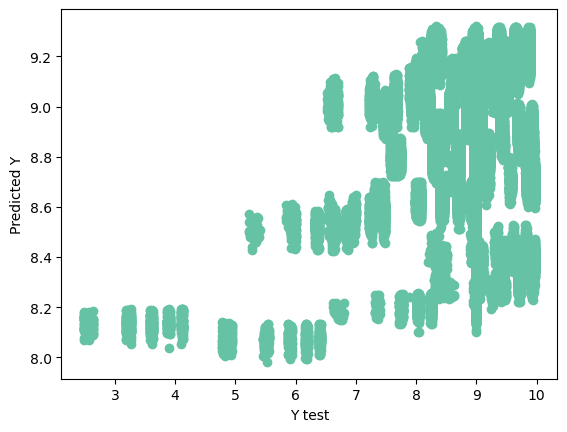

In [150]:
plt.scatter(y_test,predictions)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')

In [151]:
# Evaluate the model
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.37610239626924336
MSE: 0.3290920157324512
RMSE: 0.5736654214195337


In [152]:
# R^2 is too low. Model is not that great.
from sklearn.metrics import r2_score
r2 = r2_score(y_test,predictions)
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.1387287090112358


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


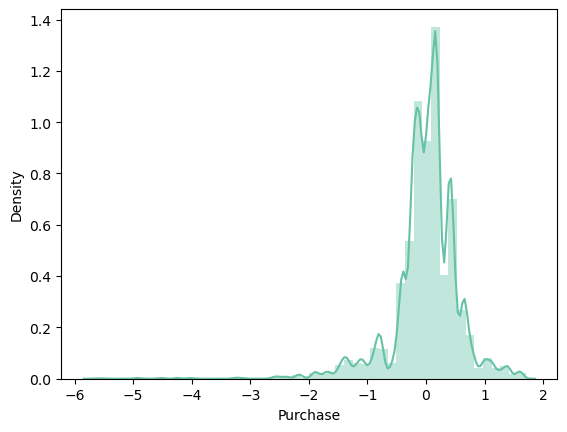

In [153]:
#Model is highly right skewed.
sns.distplot((y_test-predictions),bins=50);

In [154]:
# Using Regression Tree
from sklearn.model_selection import train_test_split

In [155]:
X = bfreport.drop('Purchase',axis=1)
y = bfreport['Purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [156]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)
predictions = regressor.predict(X_test)

In [157]:
print(predictions)

[8.61400042 6.20455776 9.14697744 ... 8.71832405 8.80725939 9.45563929]


In [158]:
from sklearn.metrics import r2_score
#R^2 improved from 0.13 to 0.47
r2_score(y_test, predictions)

0.4730607265854925

In [159]:
# predictions for random X
predictions[[3,5,6]]

array([8.67503953, 9.10684735, 8.78381688])

In [160]:
# R Score
X = bfreport.drop('Purchase',axis=1)
y = bfreport['Purchase']

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [163]:
# USing XGB Boston
import xgboost as xgb
regressor = xgb.XGBRegressor(
n_estimators=100,
reg_lambda=1,
gamma=0,
max_depth=3)

In [164]:
regressor.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [171]:
# Relative importance of each feature
# Products rank high in determining purchase.
feature_importance = pd.DataFrame(regressor.feature_importances_.reshape(1,-1),
columns = X_train.columns)
feature_importance

,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Lower_Age,Upper_Age
0,0.002495,0.003925,0.011471,0.002189,0.002751,0.955462,0.009186,0.00762,0.004901,0.0


In [166]:
y_pred = regressor.predict(X_test)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

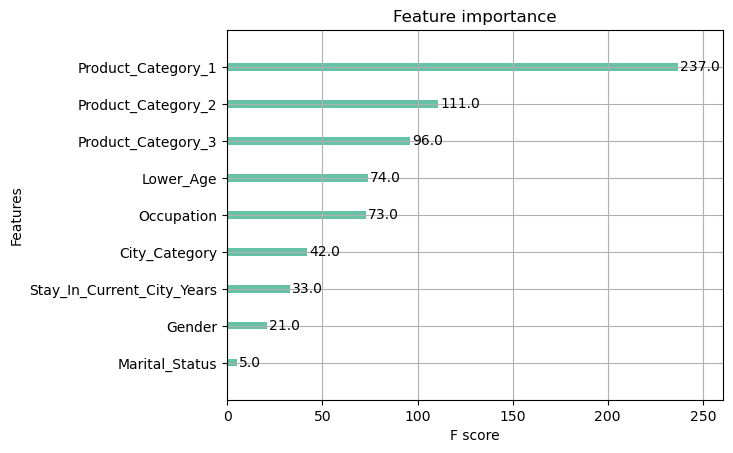

In [167]:
# Plot feature importance using inbuilt function
# According the plot,people's purchase habit can be predicted by the products they buy.
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(regressor)

In [168]:
# R^2 
#XGB Boost is the most suitable model for this data
# R^2 improved from 0.13 to 60%
r2_score(y_test, y_pred)

0.5907026000721314

In [169]:
from sklearn.metrics import mean_squared_error
# MSA is low too
mean_squared_error(y_test, y_pred)

0.15639265790652104